In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# De scikit-learn...

In [120]:
### Carga datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path = "weatherAUS.csv"
df = pd.read_csv(file_path, sep=",", engine="python")

In [121]:
### Vista de datos
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [159]:
df_copia = df.copy()

Observo el tipo de dato y la cantidad de valores nulos por cada columna.


In [179]:
df_copia.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,145412.000000,145412.000000,145412.000000,99916.000000,92261.000000,139334.000000,145412.000000,145412.000000,145412.000000,145412.000000,133296.000000,133296.000000,110457.000000,110457.000000,145412.000000,145412.000000,142153.000000
mean,72728.184393,12.193520,23.206100,2.309014,5.283761,7.784400,40.017620,14.010969,18.575152,68.981652,51.617342,1017.646900,1015.257493,4.795912,4.768571,16.954433,21.692981,2.361242
std,41990.722236,6.374749,7.099343,8.390919,3.872637,3.482637,13.413813,8.881917,8.773494,18.920713,20.579470,7.029691,6.962345,2.826093,2.545464,6.480023,6.931574,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.700000,18.000000,0.000000,3.000000,5.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.100000,1010.600000,2.000000,2.000000,12.300000,16.700000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.400000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,6.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.800000,28.200000,0.600000,6.800000,10.300000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.500000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [168]:
df_copia.dtypes

Unnamed: 0            int64
Date                 object
Location             object
MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustDir          object
WindGustSpeed       float64
WindDir9am           object
WindDir3pm           object
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainToday            object
RainTomorrow         object
RainfallTomorrow    float64
dtype: object

In [170]:
df_copia.isnull().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp                 0
MaxTemp                 0
Rainfall                0
Evaporation         45496
Sunshine            53151
WindGustDir          6078
WindGustSpeed        6078
WindDir9am              0
WindDir3pm              0
WindSpeed9am            0
WindSpeed3pm            0
Humidity9am             0
Humidity3pm             0
Pressure9am         12116
Pressure3pm         12116
Cloud9am            34955
Cloud3pm            34955
Temp9am                 0
Temp3pm                 0
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

Grafico un boxplot de una columna es particular.
Esto lo hago para ir cambiando la columna e ir viendo de cada una su distribucion y apreciar bien los outliers si es que hay.

El objetivo de esta observacion es poder determinar una medida para rellenar los valores nulos, podria usar la **Media** pero si observo una gran presencia de outliers, estos valores podrian estar sesgados, por lo que seria mejor usar una medida mas robusta como lo es la **Mediana**.


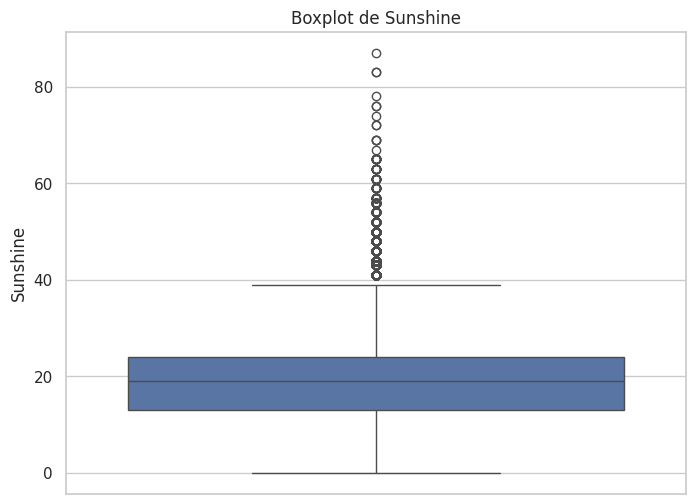

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.boxplot(y="WindSpeed3pm", data=df)
plt.title("Boxplot de Sunshine")
plt.ylabel("Sunshine")
plt.show()

Finalmente decido usar la **Mediana** como medida para rellenar los valores nulos debido a que observe gran presencia de outliers en la mayoria de columnas y con esto me quedo tranquilo de que los valores no esten sesgados.


La funcion **rellenar_nulos_por_ciudad** lo que hace es agrupar los registros por cada ciudad de la columna 'Location' y rellena los valores nulos de cada columna con la mediana de dicha columna en cada ciudad es especifico.

Esto lo hago para poder tener valores mas reales a la hora de rellenar valores nulos.

La funcion **rellenar_nulos_cat** la uso para rellenar los valores nulos de las variables que son categoricas, esto lo hago utilizando la **Moda** agrupando, igualmente, por ciudad.


In [163]:
def rellenar_nulos_por_ciudad(df, columna_ciudad, columnas_a_rellenar):
    columnas_numericas = df.select_dtypes(include=["number"])

    promedios_por_ciudad = df.groupby(columna_ciudad)[
        columnas_numericas.columns
    ].transform("median")

    for columna in columnas_a_rellenar:
        df[columna].fillna(promedios_por_ciudad[columna], inplace=True)

In [166]:
def rellenar_nulos_cat(df, columna_ciudad, columnas_a_rellenar):
    columnas_categoricas = df.select_dtypes(include=["object"])

    modas_por_ciudad = df.groupby(columna_ciudad)[columnas_a_rellenar].transform(
        lambda x: x.mode().iloc[0]
    )

    df[columnas_a_rellenar] = df[columnas_a_rellenar].fillna(modas_por_ciudad)

In [ ]:
cols = [
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "Evaporation",
    "Sunshine",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Cloud9am",
    "Cloud3pm",
    "Temp9am",
    "Temp3pm",
]
rellenar_nulos_por_ciudad(df_copia, "Location", cols)

In [169]:
columnas = ["WindGustDir", "WindDir9am", "WindDir3pm"]

rellenar_nulos_cat(df_copia, "Location", columnas)

La columna 'RainToday' tiene valores 'Yes' 'No' por lo que los mapeo a 1 para 'Yes' y 0 para 'No'.
Luego relleno los valores nulos con la moda agrupando por ciudad


In [137]:
df_copia["RainToday"] = df_copia["RainToday"].map({"Yes": 1, "No": 0})

In [140]:
df_copia["RainToday"] = df_copia.groupby("Location")["RainToday"].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)

In [156]:
registros_nulos = df_copia[df_copia["WindDir3pm"].isnull()]

registros_nulos["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [61]:
df_copia[df_copia["Location"] == "BadgerysCreek"]

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
3039,3040,2009-01-01,BadgerysCreek,13.3,34.2,0.0,NaN,NaN,W,61.0,...,51.385709,1005.6,1015.635168,NaN,NaN,21.0,22.524291,No,No,0.0
3040,3041,2009-01-02,BadgerysCreek,14.7,26.1,0.0,NaN,NaN,SE,46.0,...,54.000000,1012.9,1013.500000,NaN,NaN,20.7,22.200000,No,No,0.0
3041,3042,2009-01-03,BadgerysCreek,13.6,22.3,0.0,NaN,NaN,NNE,30.0,...,51.000000,1021.9,1019.200000,NaN,NaN,17.9,21.700000,No,No,0.0
3042,3043,2009-01-04,BadgerysCreek,17.7,31.2,0.0,NaN,NaN,NE,39.0,...,43.000000,1018.7,1013.600000,NaN,NaN,22.0,30.600000,No,No,0.0
3043,3044,2009-01-05,BadgerysCreek,15.5,38.8,0.0,NaN,NaN,SW,50.0,...,19.000000,1013.2,1007.600000,NaN,NaN,22.7,37.600000,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6042,6043,2017-06-20,BadgerysCreek,10.2,20.2,0.0,NaN,NaN,SW,19.0,...,57.000000,1029.0,1025.300000,NaN,NaN,12.4,19.000000,No,No,0.2
6043,6044,2017-06-21,BadgerysCreek,4.1,19.0,0.2,NaN,NaN,SSE,26.0,...,61.000000,1026.5,1025.700000,NaN,NaN,8.5,16.400000,No,No,0.0
6044,6045,2017-06-22,BadgerysCreek,6.8,18.3,0.0,NaN,NaN,SW,17.0,...,55.000000,1028.8,1024.600000,NaN,NaN,10.7,17.900000,No,No,0.2
6045,6046,2017-06-23,BadgerysCreek,3.8,16.8,0.2,NaN,NaN,SW,17.0,...,64.000000,1021.0,1015.100000,NaN,NaN,6.8,16.000000,No,No,0.0


In [65]:
df_copia[(df_copia["Location"] == "BadgerysCreek") & (df_copia["Cloud3pm"].isnull())]

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
3039,3040,2009-01-01,BadgerysCreek,13.3,34.2,0.0,NaN,NaN,W,61.0,...,51.385709,1005.6,1015.635168,NaN,NaN,21.0,22.524291,No,No,0.0
3040,3041,2009-01-02,BadgerysCreek,14.7,26.1,0.0,NaN,NaN,SE,46.0,...,54.000000,1012.9,1013.500000,NaN,NaN,20.7,22.200000,No,No,0.0
3041,3042,2009-01-03,BadgerysCreek,13.6,22.3,0.0,NaN,NaN,NNE,30.0,...,51.000000,1021.9,1019.200000,NaN,NaN,17.9,21.700000,No,No,0.0
3042,3043,2009-01-04,BadgerysCreek,17.7,31.2,0.0,NaN,NaN,NE,39.0,...,43.000000,1018.7,1013.600000,NaN,NaN,22.0,30.600000,No,No,0.0
3043,3044,2009-01-05,BadgerysCreek,15.5,38.8,0.0,NaN,NaN,SW,50.0,...,19.000000,1013.2,1007.600000,NaN,NaN,22.7,37.600000,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6042,6043,2017-06-20,BadgerysCreek,10.2,20.2,0.0,NaN,NaN,SW,19.0,...,57.000000,1029.0,1025.300000,NaN,NaN,12.4,19.000000,No,No,0.2
6043,6044,2017-06-21,BadgerysCreek,4.1,19.0,0.2,NaN,NaN,SSE,26.0,...,61.000000,1026.5,1025.700000,NaN,NaN,8.5,16.400000,No,No,0.0
6044,6045,2017-06-22,BadgerysCreek,6.8,18.3,0.0,NaN,NaN,SW,17.0,...,55.000000,1028.8,1024.600000,NaN,NaN,10.7,17.900000,No,No,0.2
6045,6046,2017-06-23,BadgerysCreek,3.8,16.8,0.2,NaN,NaN,SW,17.0,...,64.000000,1021.0,1015.100000,NaN,NaN,6.8,16.000000,No,No,0.0


Matriz de correlacion de las variables numericas


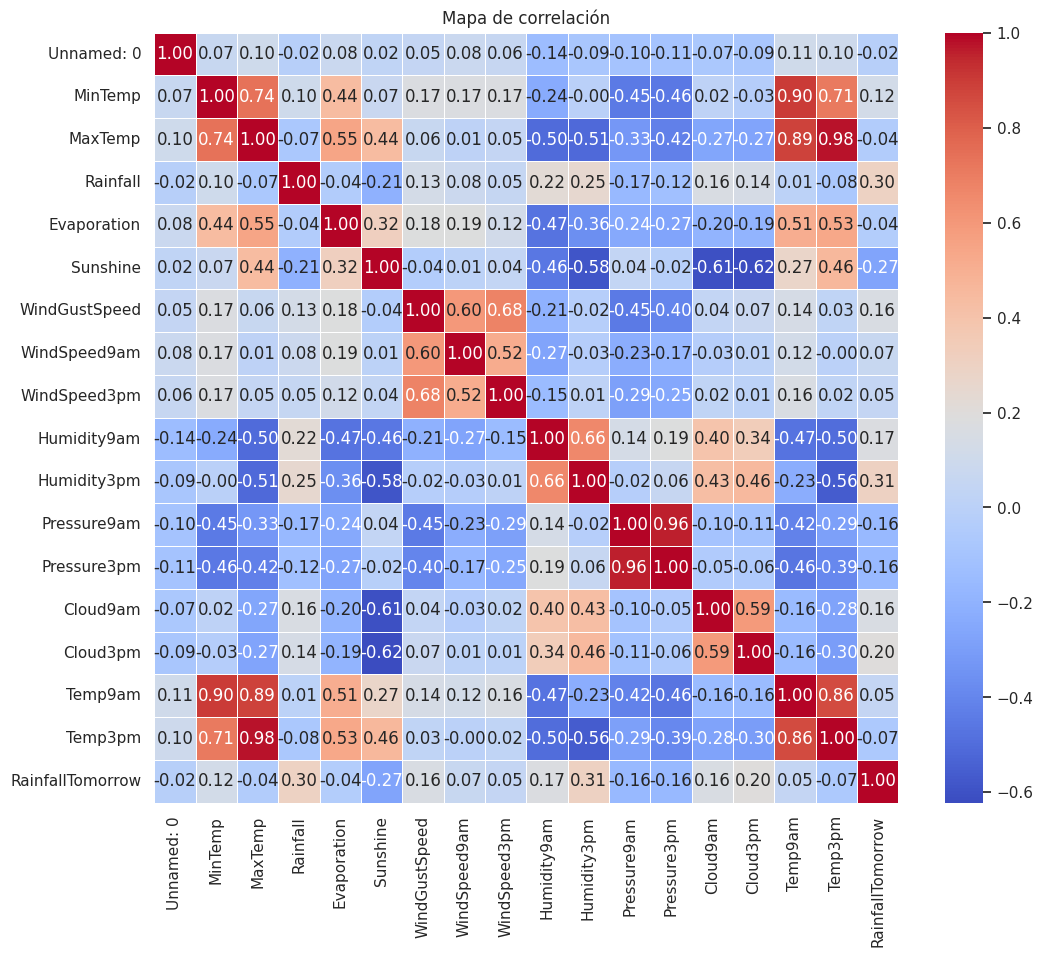

In [177]:
columnas_numericas = df_copia.select_dtypes(include=["float64", "int64"])

correlacion = columnas_numericas.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de correlación")
plt.show()

In [7]:
### Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [9]:
### Cantidad de valores faltantes.

df.isna().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

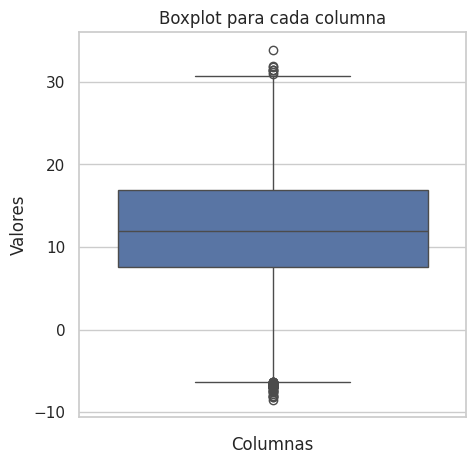

In [172]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df["MinTemp"])
plt.title("Boxplot para cada columna")
plt.xlabel("Columnas")
plt.ylabel("Valores")
plt.show()